In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression


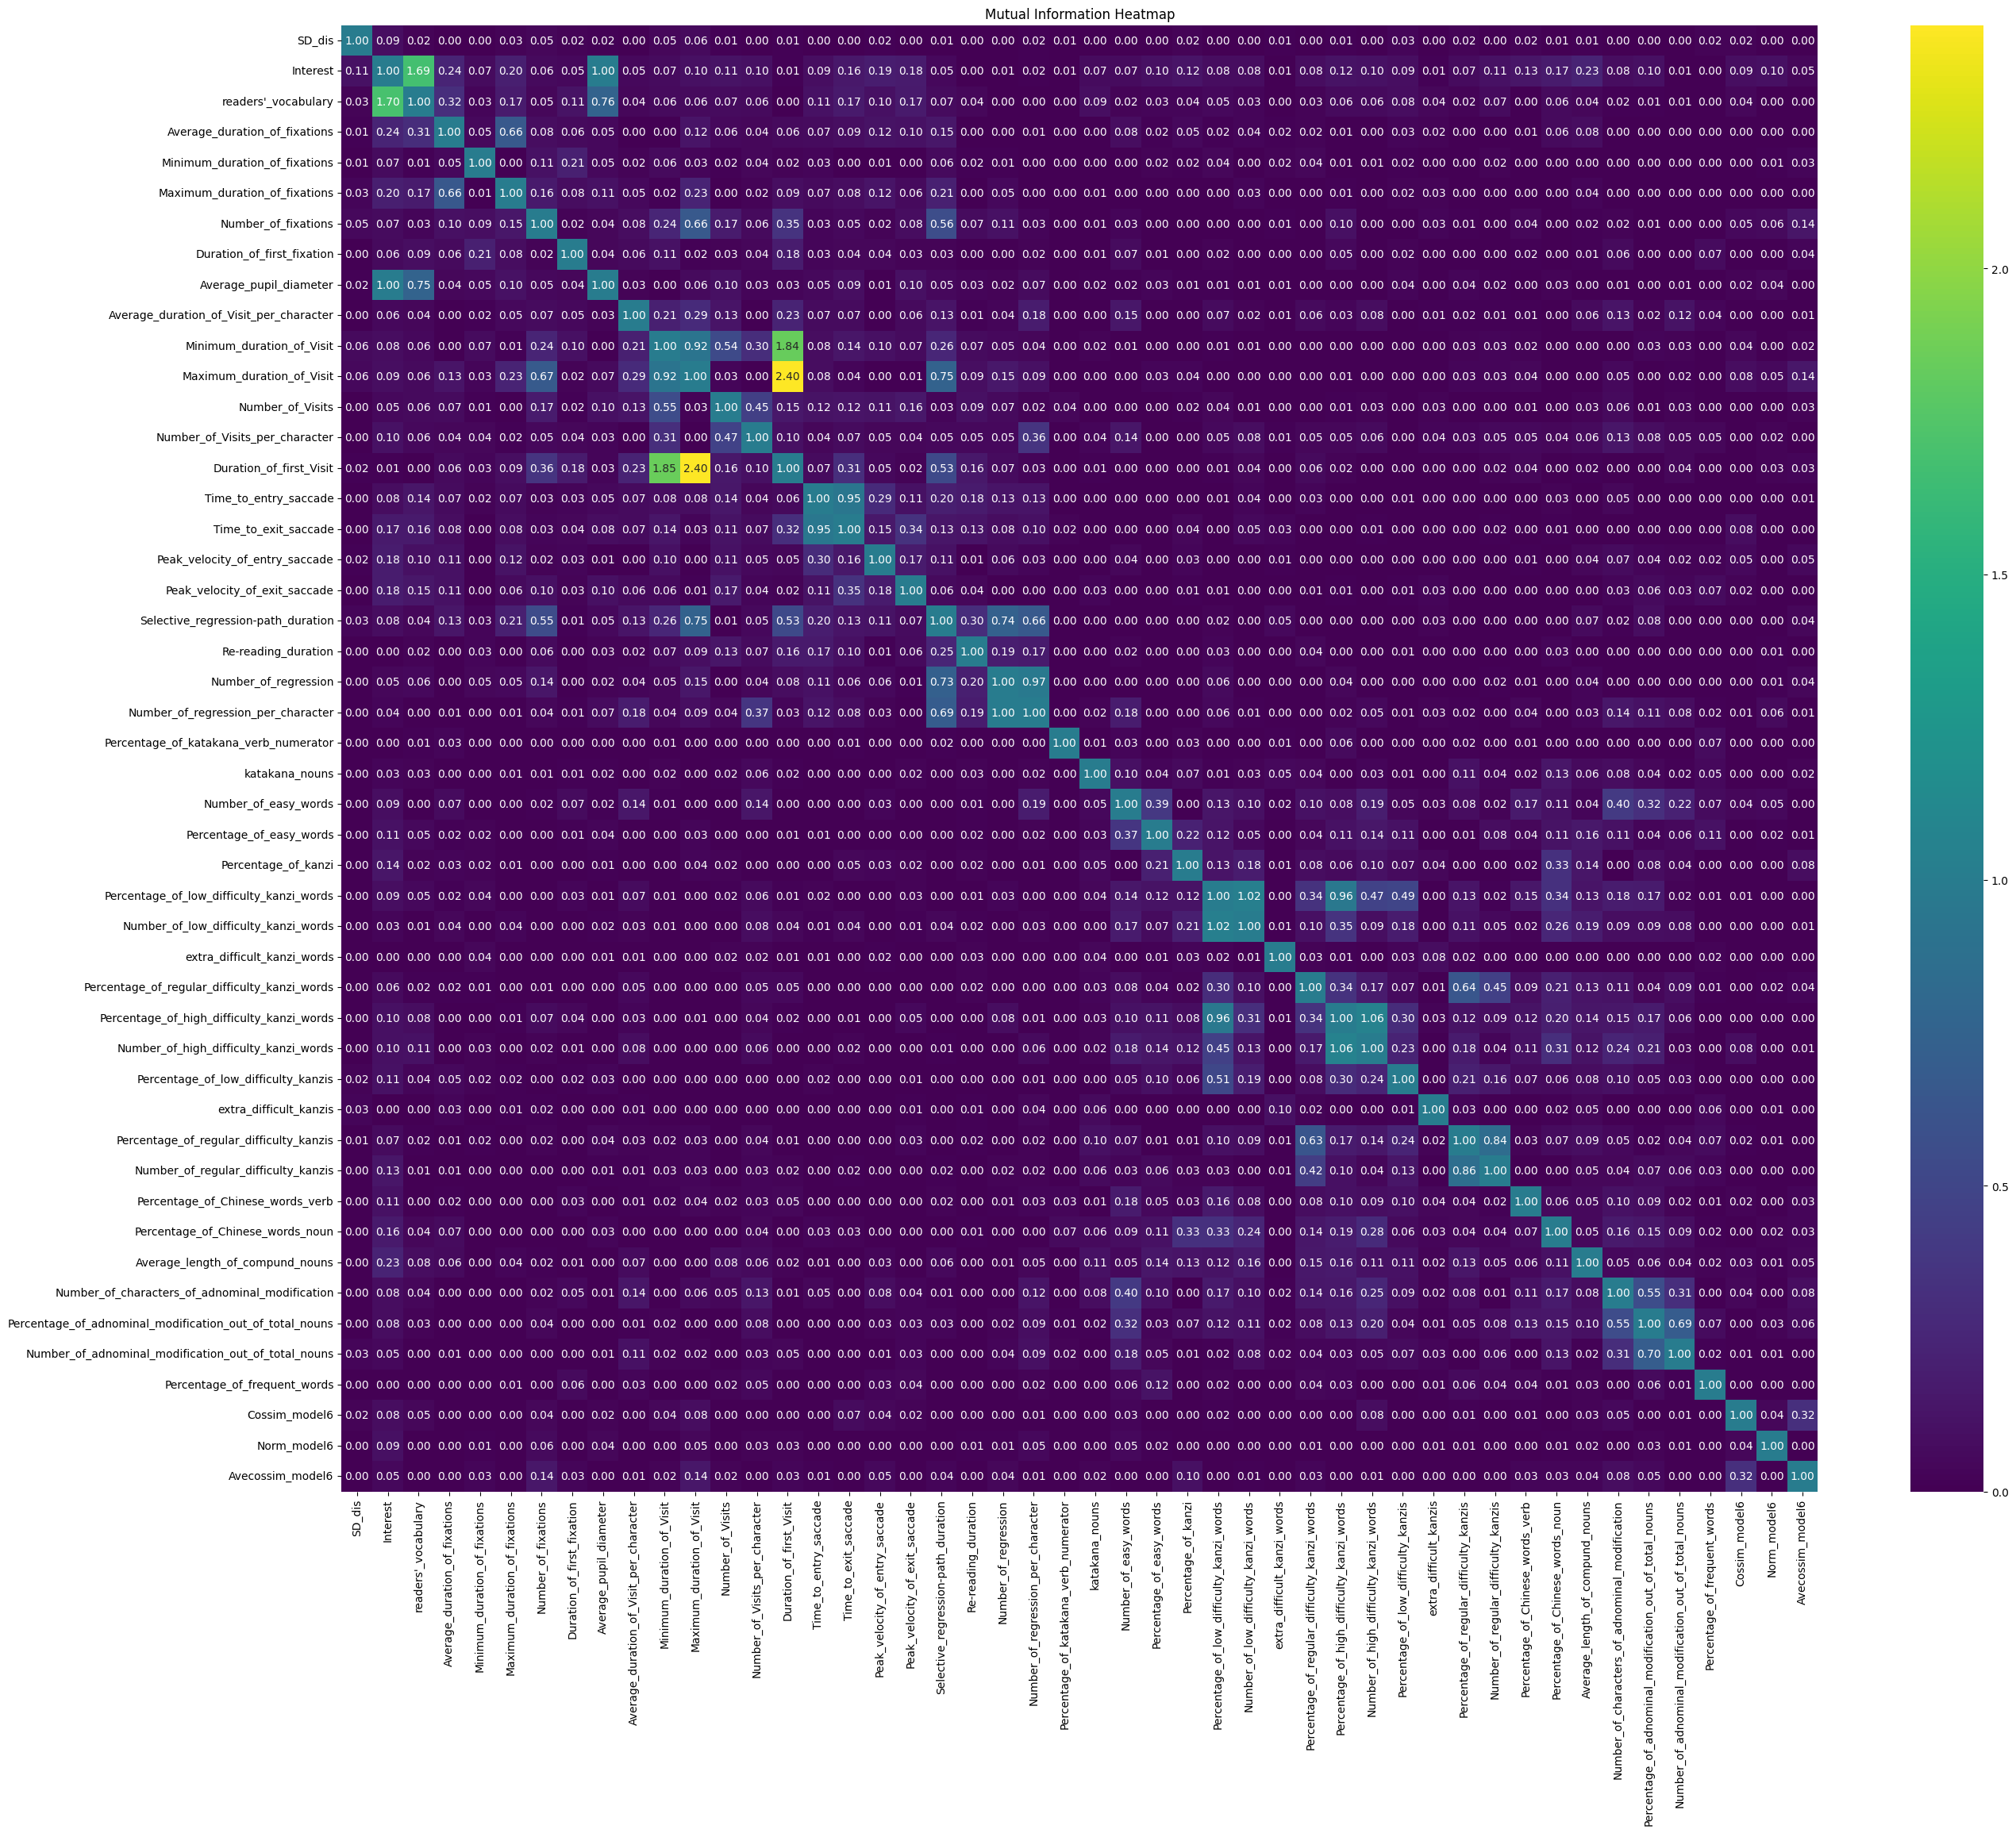

In [5]:

# Function to compute mutual information
def calculate_mutual_info(df, target_col=None, is_classification=False):
    """
    Calculate mutual information between features and target column (if provided).
    If target_col is not provided, calculates pairwise MI for all columns.
    
    :param df: DataFrame containing the dataset
    :param target_col: The target column name for MI calculation
    :param is_classification: Boolean, true if the target is categorical
    :return: DataFrame of mutual information scores
    """
    if target_col:
        X = df.drop(columns=target_col)
        y = df[target_col]

        # Determine whether to use regression or classification MI
        mi_function = mutual_info_classif if is_classification else mutual_info_regression

        mi_scores = mi_function(X, y)
        mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Information': mi_scores})
        mi_df = mi_df.sort_values(by='Mutual_Information', ascending=False)
        return mi_df

    else:
        columns = df.columns
        mi_matrix = np.zeros((len(columns), len(columns)))

        for i, col1 in enumerate(columns):
            for j, col2 in enumerate(columns):
                if i == j:
                    mi_matrix[i, j] = 1
                else:
                    temp_df = df[[col1, col2]].dropna()
                    mi_scores = mutual_info_regression(
                        temp_df[[col1]].values.reshape(-1, 1), temp_df[col2]
                    )
                    mi_matrix[i, j] = mi_scores[0]

        mi_df = pd.DataFrame(mi_matrix, index=columns, columns=columns)
        return mi_df

# Plotting mutual information
def plot_mutual_info(mi_matrix):
    plt.figure(figsize=(10*3, 8*3))
    sns.heatmap(mi_matrix, annot=True, fmt='.2f', cmap='viridis', cbar=True)
    plt.title('Mutual Information Heatmap')
    plt.show()

# Example Usage
# Replace 'your_dataset.csv' with the path to your dataset
# Ensure the dataset has been preprocessed (e.g., missing values, encoding categorical variables)
data = pd.read_csv("C:/Users/thisi/OneDrive/共有ファイル/卒研B/データ最終版/2. 最終ファイルVIF主成分分析後 (2値sddis追加).csv")
data = data.drop(columns=["SD_con"])


# Calculate MI for the dataset (pairwise)
mi_matrix = calculate_mutual_info(data)

# Plot the heatmap of MI
plot_mutual_info(mi_matrix)
